In [10]:
import sys
sys.path.append("../")
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import animation
from tqdm import *

from theory.units import *
from simulation.demo_sim import DemoSim

from IPython.display import HTML
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Make banner animation gif for code repo

In [185]:
from plot_params import params

pylab.rcParams.update(params)
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']
output_dir = "../plots/"

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


../simulation/demo_sim.py:84: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ("mu", float, 1)])
../simulation/demo_sim.py:130: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ("v_y", float, 1)])


0


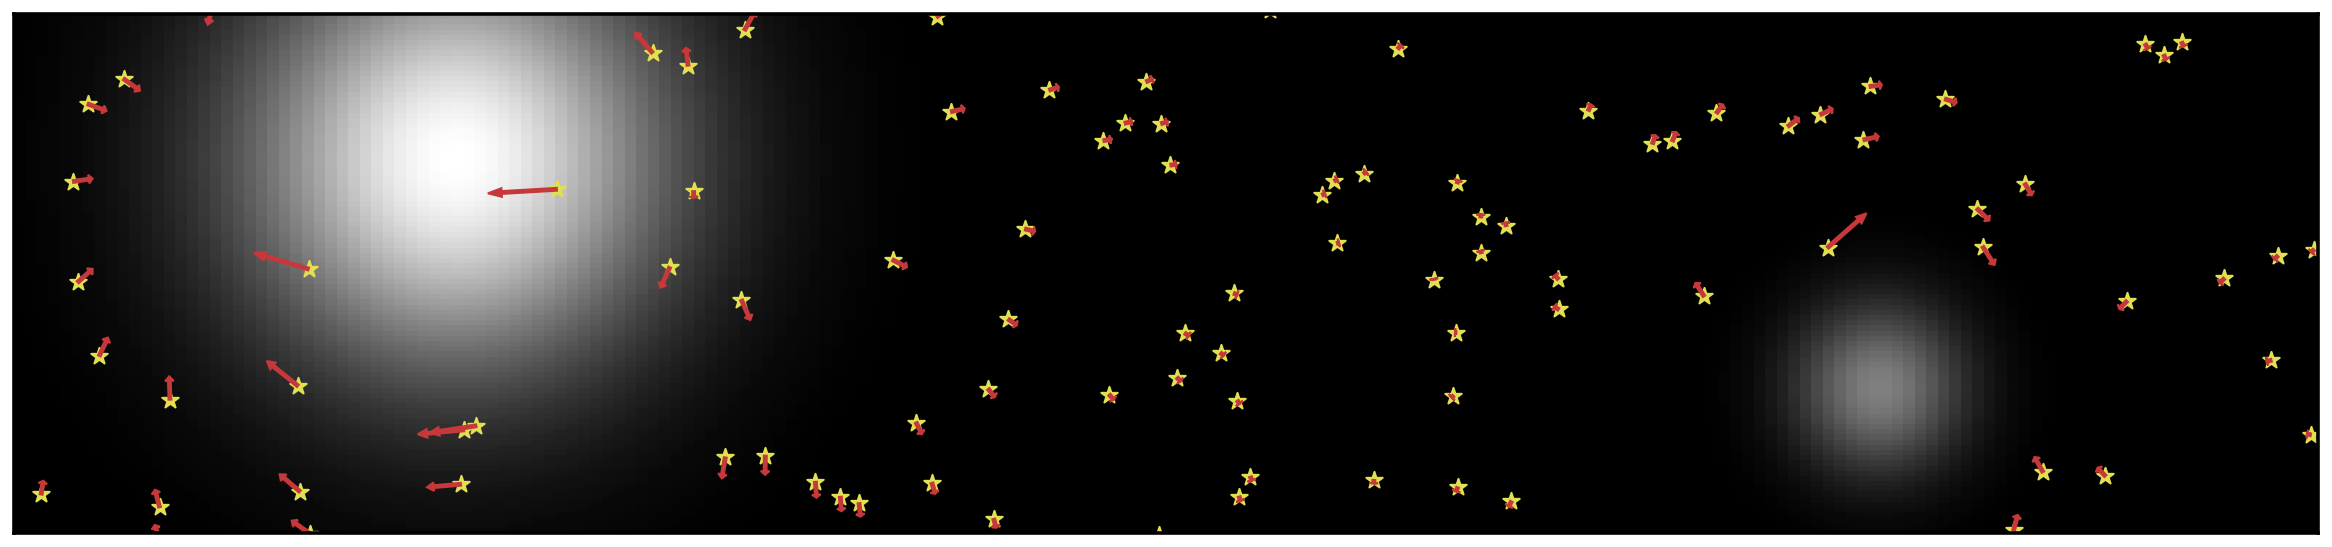

In [212]:
theta_x_lims = [-1.6 / 2., 1.6 / 2.]
theta_y_lims = [-0.9 / 5., 0.9 / 5.]

ds = DemoSim(theta_x_lims, theta_y_lims)

arrow_kwargs={'color':cols_default[0], 'width':0.01}
star_kwargs={'marker':'*', 'color':cols_default[5],'s':75}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':75}

n_lens = 2

pos_l_ary = np.array([[-0.5, 0.08], [0.5, -0.08]])
v_l_ary = np.array([[20, 0], [-10, 0]]) * Kmps
R_l_ary = np.array([0.05, 0.02]) * pc
M_l_ary = 10 ** np.array([5.3, 5.]) * M_s

anim = ds.animation(dt=100, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=650, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=200, n_lens_y=100, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 1000,
                    source_pos="random",
                   figsize=(10 * (theta_x_lims[1] - theta_x_lims[0]), 10 * (theta_y_lims[1] - theta_y_lims[0])))

In [213]:
HTML(anim.to_html5_video())

In [217]:
anim.save(output_dir + "correlations.gif", writer='imagemagick', fps=25)